In [95]:
import csv
import pandas as pd
import numpy as np
import math

# 1. Boston Housing Data set

In [5]:
data_housing = pd.read_csv('./data/bostonhousing.csv')

## Field
* CRIM : 1인당 범죄율
* ZN : 25,000 피트를 초과하는 거주 지역의 비율
* INDUS : 비소매상업지역 점유 토지 비율
* CHAS : 찰스강에 대한 변수 (강 주변인지 아닌지)
* NOX : 10ppm 당 농축 일산화질소
* RM : 주책 1가구당 평균 방의 개수
* AGE : 1940년 이전 건축된 주택 비율
* DIS : 5개 보스턴 직업센터 접근성 지수
* RAD : 방사형 도로까지 접근성 지수
* TAX : 10,000 달러 당 재산세율
* PRATIO : 자치시별 학생/교사 비율
* B : 흑인 비율
* LSTAT : 하위계층 비율
* MEDV : 주택가격 ($1,000비율) - 정답지

In [6]:
data_housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [8]:
data_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1.1 Linear Regression with all feature
* 10-fold cross validation

In [41]:
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict

In [48]:
X = data_housing[data_housing.columns[0:13]]
Y = data_housing['medv']

In [49]:
reg = linear_model.LinearRegression()

In [69]:
predicted = cross_val_predict(reg, X,Y,cv=10)
print 'MSE - test: %s' % mean_squared_error( predicted, Y)

MSE - test: 34.53965954


### 1.1.1 plot

In [52]:
import matplotlib.pyplot as plt

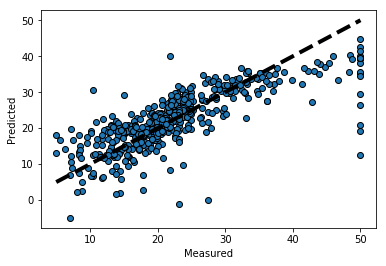

In [70]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0,0,0))
ax.plot([Y.min(),Y.max()], [Y.min(),Y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 1.2 Feature Selection
* plot
* feature selection algorithm

for crim


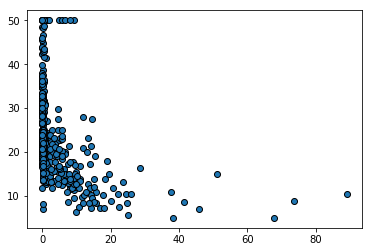

for zn


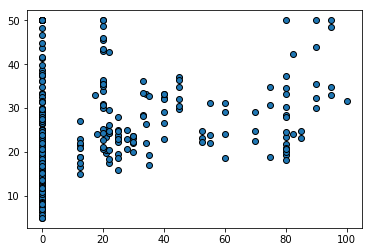

for indus


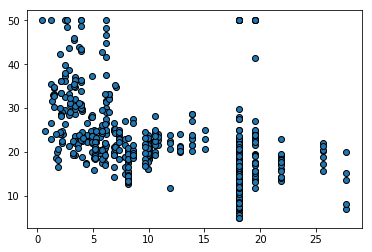

for chas


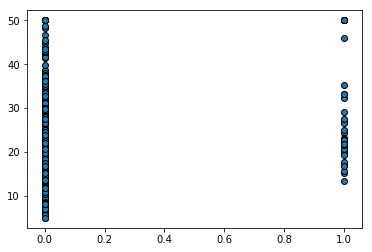

for nox


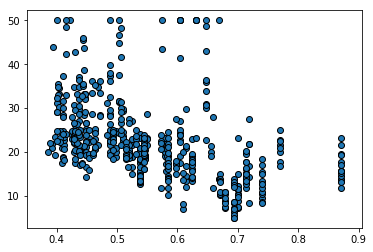

for rm


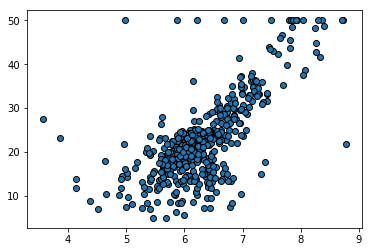

for age


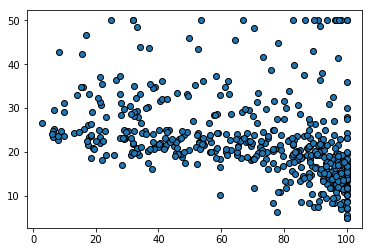

for dis


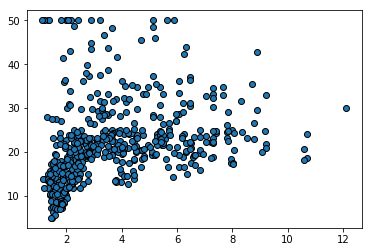

for rad


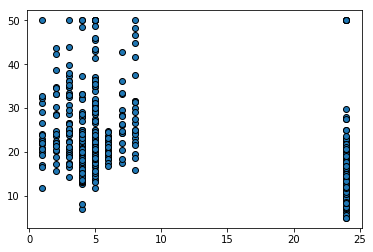

for tax


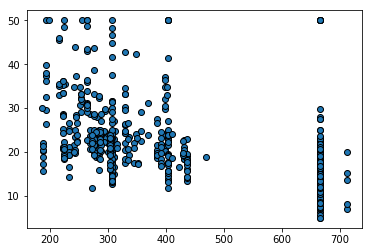

for ptratio


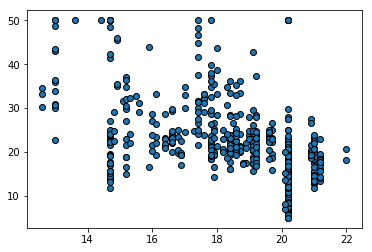

for b


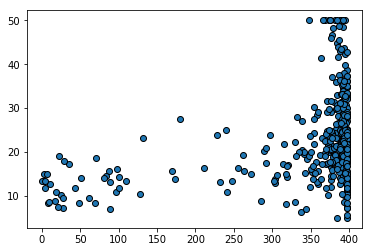

for lstat


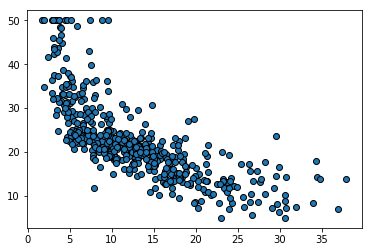

In [56]:
columns = list(X.columns.values)
for col in columns:
    print "for",col
    fig, ax = plt.subplots()
    ax.scatter(X[col],Y, edgecolors=(0,0,0))
    plt.show()

* 비례 : rm
* 약비례 : zn, dis, b
* 반비례 : crim, lstat
* 약반비례 : indus, nox, age,  tax, ptratio
* ? : chas, rad

In [61]:
X_1 = X.drop(['chas','rad','tax','ptratio'],1)

In [71]:
predicted = cross_val_predict(reg, X_1,Y,cv=10)
print 'MSE - test: %s' % mean_squared_error( predicted, Y)

MSE - test: 37.4777089512


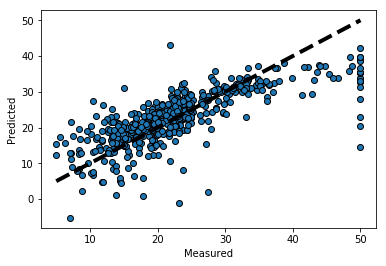

In [72]:
predicted = cross_val_predict(reg, X_1,Y,cv=10)
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0,0,0))
ax.plot([Y.min(),Y.max()], [Y.min(),Y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### 1.2.1 correlation coefficient

In [54]:
corrcoef = []
for col in data_housing.columns:
    value= abs(numpy.corrcoef(data_housing['medv'],data_housing[col])[0][1])
    corrcoef.append([col,value])
    
corrcoef.sort(key=lambda x: x[1],reverse=True)

for value in corrcoef:
    print "for col", value[0],":",value[1]

for col medv : 1.0
for col lstat : 0.737662726174
for col rm : 0.695359947072
for col ptratio : 0.507786685538
for col indus : 0.483725160028
for col tax : 0.468535933568
for col nox : 0.427320772373
for col crim : 0.388304608587
for col rad : 0.38162623064
for col age : 0.376954565005
for col zn : 0.360445342451
for col b : 0.333460819657
for col dis : 0.249928734086
for col chas : 0.17526017719


In [77]:
X_2 = X.drop(['chas','dis','b','zn'],1)

In [78]:
predicted = cross_val_predict(reg, X_2,Y,cv=10)
print 'MSE - test: %s' % mean_squared_error( predicted, Y)

MSE - test: 37.1094580787


### 1.2.2 Integrate

In [87]:
X_3 = X.drop(['chas','dis','b','zn','tax','rad'],1)

predicted = cross_val_predict(reg, X_3,Y,cv=10)
print 'MSE - test: %s' % mean_squared_error( predicted, Y)

MSE - test: 34.9377158529


# 2. Clustering
## 2.1 K-means

In [90]:
from sklearn.cluster import KMeans

In [89]:
data_iris = pd.read_csv('./data/iris.csv')

In [91]:
X = data_iris[data_iris.columns[0:4]]
Y = data_iris['species']

In [92]:
kmean = KMeans(n_clusters=3)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## 2.2 results

In [106]:

#We store the K-means results in a dataframe
Y_pred = np.choose(kmean.labels_, [1, 0, 2]).astype(np.int64)

pred = pd.DataFrame(Y_pred)
pred.columns = ['Species']

#we merge this dataframe with df
prediction = pd.concat([X,pred], axis = 1)

#We store the clusters
clus0 = prediction.loc[prediction.Species == 0]
clus1 = prediction.loc[prediction.Species == 1]
clus2 = prediction.loc[prediction.Species == 2]
k_list = [clus0.values, clus1.values,clus2.values]

In [115]:
result = prediction.assign(species_real=data_iris['species'])

In [116]:
result

,sepal_length,sepal_width,petal_length,petal_width,Species,species_real
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
5,5.4,3.9,1.7,0.4,1,setosa
6,4.6,3.4,1.4,0.3,1,setosa
7,5.0,3.4,1.5,0.2,1,setosa
8,4.4,2.9,1.4,0.2,1,setosa
9,4.9,3.1,1.5,0.1,1,setosa


In [117]:
from collections import defaultdict

In [123]:
pred_res = defaultdict(lambda:0)

In [124]:
for d in result.values:
    key = str(d[5])+"to"+str(d[4])
    pred_res[key]+=1


In [125]:
pred_res

defaultdict(<function __main__.<lambda>>,
            {'setosato1': 50,
             'versicolorto0': 48,
             'versicolorto2': 2,
             'virginicato0': 14,
             'virginicato2': 36})

* **versicolorto** : 0 (48, 2 errors)
* **setosa** : 1 (50, 0 errors)
* **virginicato** : 2  (36, 14 errors)

132 /150 = 89%